<h3 style = "color : red ;">Importing the essentials</h3>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [2]:
maindata = pd.read_csv('Dataset/train_u6lujuX_CVtuZ9i (1).csv')

<h1 style = "color : Blue ;"> Data analysis and setup</h1>

In [3]:
maindata.shape

(614, 13)

In [4]:
maindata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data = maindata.drop(columns="Loan_ID")
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<h3 style = "color : red ;">Dropping the missing values</h3>

In [30]:
data1 = data.dropna()

In [31]:
data1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
data1.shape

(480, 12)

In [33]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [34]:
data1.value_counts('Loan_Status')

Loan_Status
Y    332
N    148
Name: count, dtype: int64

In [35]:
data1.value_counts('Property_Area')

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [36]:
data1.value_counts('Gender')

Gender
Male      394
Female     86
Name: count, dtype: int64

In [37]:
data1.value_counts('Married')

Married
Yes    311
No     169
Name: count, dtype: int64

In [38]:
data1.value_counts('Education')

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

<h3 style = "color : red ;">Have to make the data to 0s and 1s for better understanding and processing</h3>

In [41]:
data1.replace({'Loan_Status':{'N':0,'Y':1},'Gender':{'Female':0,'Male':1}, 'Married':{'No':0,'Yes':1}, 'Education':{'Not Graduate' :0,'Graduate':1},
              'Self_Employed':{'No':0, 'Yes':1},'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}},inplace=True)

<h1 style = "color : Blue ;">Yes:1 <br> No :0</h1>

In [42]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


<h3 style = "color : red ;">Fixing the dependent</h3>

In [44]:
data1.value_counts('Dependents')

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [48]:
# to replace the 3+ as it may create error in the processing
Loandata = data1.replace(to_replace= '3+', value=4)

In [49]:
Loandata.value_counts('Dependents')

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<h1 style = "color : Blue ;"> Data Visualization</h1>

C:\Users\amane chor\AppData\Local\Temp\ipykernel_1700\3940818357.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\amane chor\AppData\Local\Temp\ipykernel_1700\3940818357.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\amane chor\AppDat

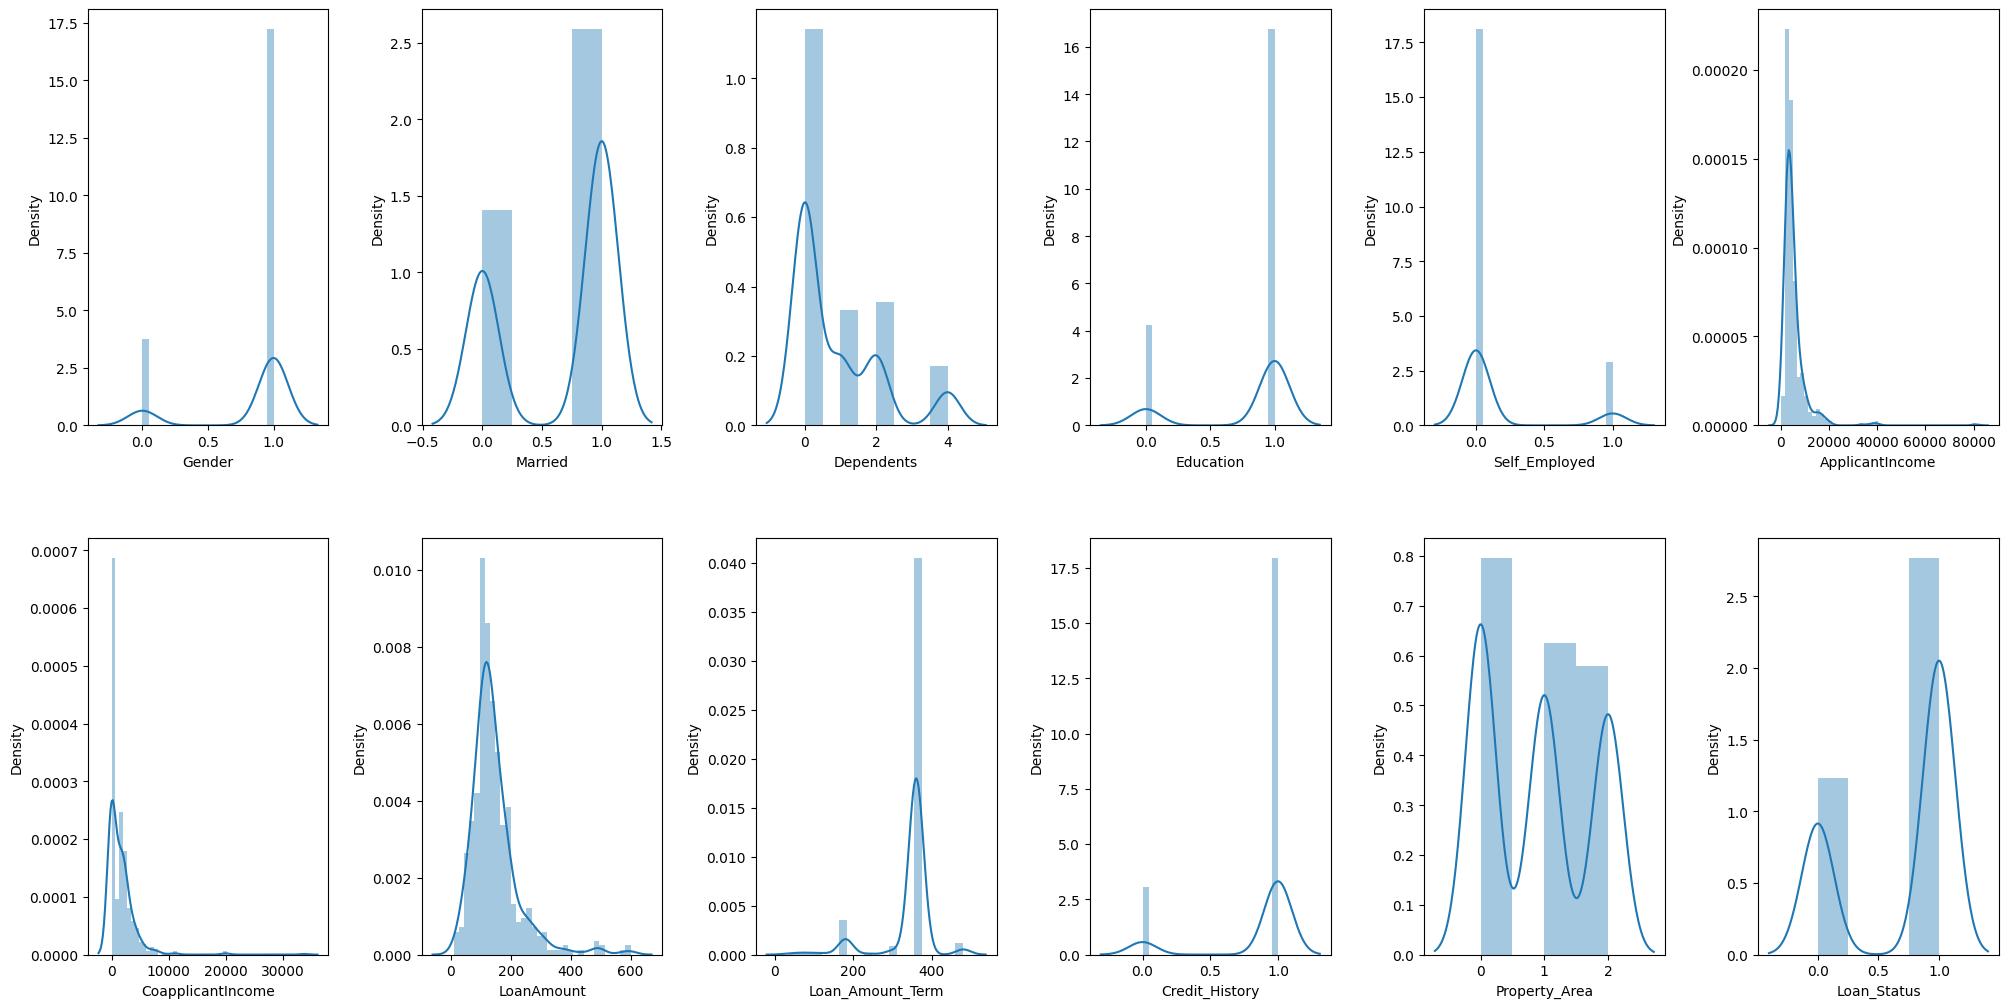

In [62]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Loandata.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [65]:
datacorr= Loandata.corr()

<Axes: >

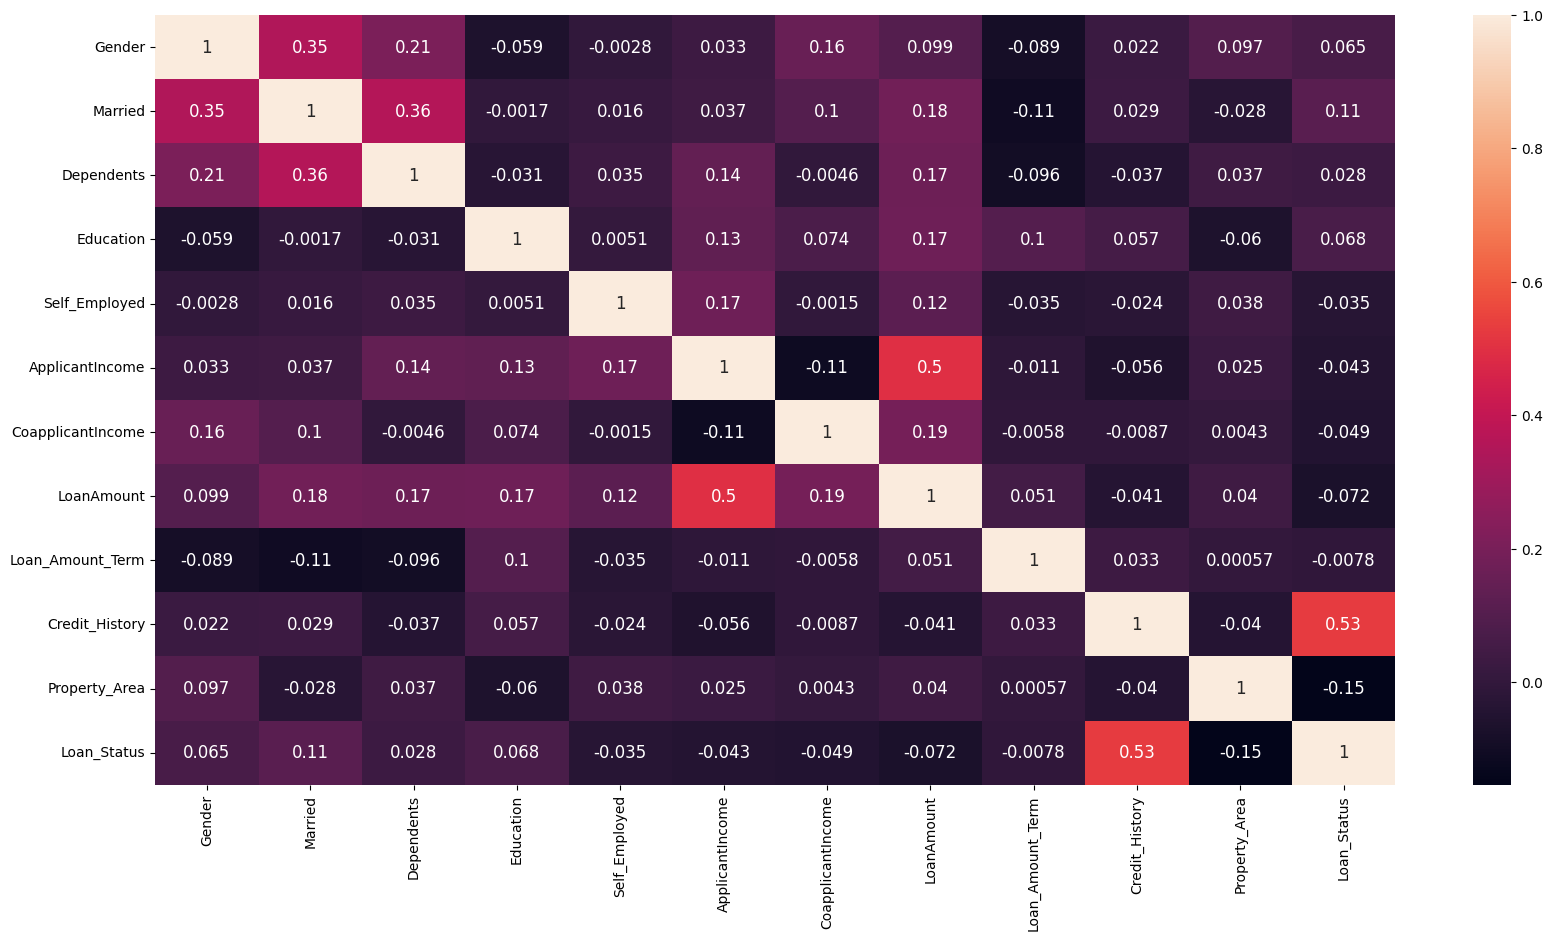

In [71]:
plt.figure(figsize=(20,10))
sns.heatmap(datacorr, annot=True,annot_kws={'size':12})